H0: после внедрения первой кампании конверсия и количество покупок остались неизменными.
H1: после внедрения первой компании конверсия и количество покупок возросли.

In [1]:
import sqlite3
import pandas as pd


db_path = "E:/shop_database.db"  
conn = sqlite3.connect(db_path)


purchases_df = pd.read_sql_query("SELECT * FROM purchases", conn)
coeffs_df = pd.read_sql_query("SELECT * FROM personal_data_coeffs", conn)
personal_df = pd.read_sql_query("SELECT * FROM personal_data WHERE country = 32", conn)

print("purchases:", purchases_df.shape)
print("personal_data_coeffs:", coeffs_df.shape)
print("personal_data:", personal_df.shape)
print(purchases_df.head())
print(coeffs_df.head())
print(personal_df.head())


merged_df = pd.merge(personal_df, coeffs_df, on='id', how='left')


final_df = pd.merge(merged_df, purchases_df, on='id', how='left')

print(final_df.head())
final_df.to_csv("combined_data.csv", index=False)

conn.close()


purchases: (786260, 7)
personal_data_coeffs: (104989, 5)
personal_data: (88786, 6)
   id                                            product       colour   cost  \
0   0        Велосипед горный женский Stern Mira 2.0 26"  белый/синий  13599   
1   0                                    Стол Outventure      зелёный   1499   
2   0                   Набор Outventure: стол + 4 стула      бежевый   4799   
3   3                            Бутсы мужские GSD Astro        белый   1599   
4   3  Мяч футбольный PUMA TEAMFINAL 21.2 FIFA QUALIT...   мультицвет   7199   

   product_sex  base_sale  dt  
0          0.0          1   7  
1          NaN          0  37  
2          NaN          0  37  
3          1.0          0  13  
4          NaN          0  27  
   id  lbt_coef   ac_coef   sm_coef  personal_coef
0   0  5.078678 -0.307147  0.959027         0.5072
1   3  7.764766 -0.030225  0.794720         0.4304
2   4  4.569378  0.063693  0.820892         0.5072
3   6  8.150379  0.075200  0.836140     

In [2]:
pers_data_lost = pd.read_csv("E:/personal_data_1.csv")
pers_data_lost.head()

,id,age,education,city,country
0,101492,32,среднее,1188,32
1,42690,20,высшее,1134,32
2,113001,27,среднее,1187,32
3,163654,49,высшее,1160,32
4,69523,44,среднее,1137,32


In [3]:
personal_data = pd.read_csv("E:/personal_data.csv")
personal_data.head()


,id,age,education,city,country
0,101492,32,среднее,1188,32
1,42690,20,высшее,1134,32
2,113001,27,среднее,1187,32
3,163654,49,высшее,1160,32
4,69523,44,среднее,1137,32


In [4]:
pers_data = pd.merge(personal_data, pers_data_lost, how='left')
pers_data.drop_duplicates()
pers_data.isna().sum()

id           0
age          0
education    0
city         0
country      0
dtype: int64

In [5]:
final_df.head()

,id,gender,age,education,city,country,lbt_coef,ac_coef,sm_coef,personal_coef,product,colour,cost,product_sex,base_sale,dt
0,0,0,36,среднее,1201,32,5.078678,-0.307147,0.959027,0.5072,"Велосипед горный женский Stern Mira 2.0 26""",белый/синий,13599,0.0,1,7
1,0,0,36,среднее,1201,32,5.078678,-0.307147,0.959027,0.5072,Стол Outventure,зелёный,1499,NaN,0,37
2,0,0,36,среднее,1201,32,5.078678,-0.307147,0.959027,0.5072,Набор Outventure: стол + 4 стула,бежевый,4799,NaN,0,37
3,4,0,35,среднее,1134,32,4.569378,0.063693,0.820892,0.5072,Роликовые коньки детские Roces Orlando III,черный/розовый,9199,NaN,0,0
4,4,0,35,среднее,1134,32,4.569378,0.063693,0.820892,0.5072,Шлем FILA NRK FUN,белый,4999,NaN,0,0


In [6]:
df = pd.merge(final_df, pers_data, how='outer')
df.head()

,id,gender,age,education,city,country,lbt_coef,ac_coef,sm_coef,personal_coef,product,colour,cost,product_sex,base_sale,dt
0,0,0.0,36,среднее,1201,32,5.078678,-0.307147,0.959027,0.5072,"Велосипед горный женский Stern Mira 2.0 26""",белый/синий,13599.0,0.0,1.0,7.0
1,0,0.0,36,среднее,1201,32,5.078678,-0.307147,0.959027,0.5072,Стол Outventure,зелёный,1499.0,NaN,0.0,37.0
2,0,0.0,36,среднее,1201,32,5.078678,-0.307147,0.959027,0.5072,Набор Outventure: стол + 4 стула,бежевый,4799.0,NaN,0.0,37.0
3,3,NaN,31,среднее,1134,32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,0.0,35,среднее,1134,32,4.569378,0.063693,0.820892,0.5072,Роликовые коньки детские Roces Orlando III,черный/розовый,9199.0,NaN,0.0,0.0


In [7]:


with open("E:/ids_first_company_positive.txt", 'r', encoding='utf-8') as file:
    lines = file.readlines()
ids_line = lines[1].strip()
ids_positive = ids_line.split(',')
df_positive = pd.DataFrame(ids_positive, columns=['id'])
df_positive['id'] = pd.to_numeric(df_positive['id'], errors='coerce')
df_positive['group'] = 'positive'
print("Positive IDs:")



with open("E:/ids_first_company_negative.txt", 'r', encoding='utf-8') as file:
    lines = file.readlines()
ids_line = lines[1].strip()
ids_negative = ids_line.split(';')
df_negative = pd.DataFrame(ids_negative, columns=['id'])
df_negative['id'] = pd.to_numeric(df_negative['id'], errors='coerce')
df_negative['group'] = 'negative'







Positive IDs:


In [8]:
df_positive.head()

,id,group
0,4,positive
1,169500,positive
2,98299,positive
3,23240,positive
4,103766,positive


In [9]:
df_negative.head()

,id,group
0,30,negative
1,53388,negative
2,103852,negative
3,84418,negative
4,154089,negative


In [10]:
df_groups = pd.merge(df_negative, df_positive, how='outer')
df_groups.head()


,id,group
0,4,positive
1,30,negative
2,75,negative
3,536,positive
4,850,positive


In [11]:
df = pd.merge(df_groups, df, how='outer')
df.head()

,id,group,gender,age,education,city,country,lbt_coef,ac_coef,sm_coef,personal_coef,product,colour,cost,product_sex,base_sale,dt
0,0,NaN,0.0,36.0,среднее,1201.0,32.0,5.078678,-0.307147,0.959027,0.5072,"Велосипед горный женский Stern Mira 2.0 26""",белый/синий,13599.0,0.0,1.0,7.0
1,0,NaN,0.0,36.0,среднее,1201.0,32.0,5.078678,-0.307147,0.959027,0.5072,Стол Outventure,зелёный,1499.0,NaN,0.0,37.0
2,0,NaN,0.0,36.0,среднее,1201.0,32.0,5.078678,-0.307147,0.959027,0.5072,Набор Outventure: стол + 4 стула,бежевый,4799.0,NaN,0.0,37.0
3,3,NaN,NaN,31.0,среднее,1134.0,32.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,positive,0.0,35.0,среднее,1134.0,32.0,4.569378,0.063693,0.820892,0.5072,Роликовые коньки детские Roces Orlando III,черный/розовый,9199.0,NaN,0.0,0.0


In [12]:
df.columns.to_list()

['id',
 'group',
 'gender',
 'age',
 'education',
 'city',
 'country',
 'lbt_coef',
 'ac_coef',
 'sm_coef',
 'personal_coef',
 'product',
 'colour',
 'cost',
 'product_sex',
 'base_sale',
 'dt']

In [13]:
unique_users = df[['id', 'group']].drop_duplicates()

users_with_purchases = df[df['cost'] > 0][['id', 'group']].drop_duplicates()

unique_positive = unique_users[unique_users['group'] == 'positive']['id'].nunique()
unique_negative = unique_users[unique_users['group'] == 'negative']['id'].nunique()

purchases_positive = users_with_purchases[users_with_purchases['group'] == 'positive']['id'].nunique()
purchases_negative = users_with_purchases[users_with_purchases['group'] == 'negative']['id'].nunique()

In [14]:
conversion_positive = purchases_positive / unique_positive if unique_positive > 0 else 0
conversion_negative = purchases_negative / unique_negative if unique_negative > 0 else 0
print(conversion_negative)
print(conversion_positive)

0.8354430379746836
0.8544303797468354


In [15]:
unique_users = df[['id', 'group']].drop_duplicates()
n_total_positive = unique_users[unique_users['group'] == 'positive']['id'].nunique()
n_total_negative = unique_users[unique_users['group'] == 'negative']['id'].nunique()


buyers = df[df['cost'] > 0][['id', 'group']].drop_duplicates()
n_buyers_positive = buyers[buyers['group'] == 'positive']['id'].nunique()
n_buyers_negative = buyers[buyers['group'] == 'negative']['id'].nunique()

revenue_total_positive = df[df['group'] == 'positive']['cost'].sum()
revenue_total_negative = df[df['group'] == 'negative']['cost'].sum()
revenue_buyers_positive = df[(df['group'] == 'positive') & (df['cost'] > 0)]['cost'].sum()
revenue_buyers_negative = df[(df['group'] == 'negative') & (df['cost'] > 0)]['cost'].sum()

arpu_positive = revenue_total_positive / n_total_positive if n_total_positive > 0 else 0
arpu_negative = revenue_total_negative / n_total_negative if n_total_negative > 0 else 0

arppu_positive = revenue_buyers_positive / n_buyers_positive if n_buyers_positive > 0 else 0
arppu_negative = revenue_buyers_negative / n_buyers_negative if n_buyers_negative > 0 else 0

lift = (arpu_positive - arpu_negative) / arpu_negative if arpu_negative != 0 else float('inf') if arpu_positive > 0 else 0

print(f"ARPU (positive): {arpu_positive:.2f}")
print(f"ARPU (negative): {arpu_negative:.2f}")
print(f"ARPPU (positive): {arppu_positive:.2f}")
print(f"ARPPU (negative): {arppu_negative:.2f}")
print(f"Lift: {lift:.2%}")

ARPU (positive): 52190.63
ARPU (negative): 51330.52
ARPPU (positive): 61082.36
ARPPU (negative): 61441.08
Lift: 1.68%


In [16]:
conversion_df = pd.DataFrame({
    'group': ['positive', 'negative'],
    'conversion': [conversion_positive, conversion_negative]
})


df = pd.merge(df, conversion_df, on='group', how='left')
df.head()


,id,group,gender,age,education,city,country,lbt_coef,ac_coef,sm_coef,personal_coef,product,colour,cost,product_sex,base_sale,dt,conversion
0,0,NaN,0.0,36.0,среднее,1201.0,32.0,5.078678,-0.307147,0.959027,0.5072,"Велосипед горный женский Stern Mira 2.0 26""",белый/синий,13599.0,0.0,1.0,7.0,NaN
1,0,NaN,0.0,36.0,среднее,1201.0,32.0,5.078678,-0.307147,0.959027,0.5072,Стол Outventure,зелёный,1499.0,NaN,0.0,37.0,NaN
2,0,NaN,0.0,36.0,среднее,1201.0,32.0,5.078678,-0.307147,0.959027,0.5072,Набор Outventure: стол + 4 стула,бежевый,4799.0,NaN,0.0,37.0,NaN
3,3,NaN,NaN,31.0,среднее,1134.0,32.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,positive,0.0,35.0,среднее,1134.0,32.0,4.569378,0.063693,0.820892,0.5072,Роликовые коньки детские Roces Orlando III,черный/розовый,9199.0,NaN,0.0,0.0,0.85443


C:\Users\андрей\AppData\Local\Temp\ipykernel_6984\1137072131.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Группа')


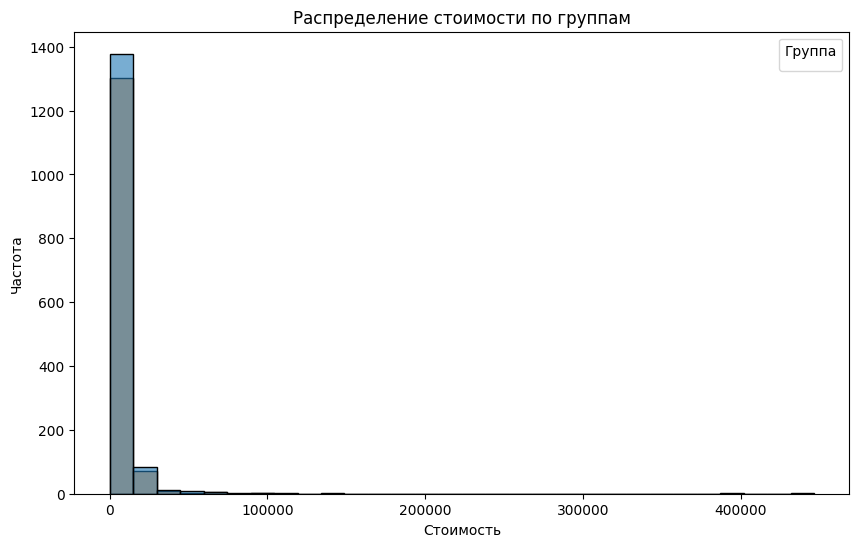

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(10, 6))
sns.histplot(data=df[df['group'].isin(['positive', 'negative'])], 
             x='cost', hue='group', bins=30, alpha=0.6)
plt.xlabel('Стоимость')
plt.ylabel('Частота')
plt.title('Распределение стоимости по группам')
plt.legend(title='Группа')
plt.show()

In [18]:
numerical_cols = df.select_dtypes(include=['float64, int64'])
Q1 = df[numerical_cols].quantile(0.25)
Q3 = df[numerical_cols].quantile(0.75)
IQR = Q3 - Q1
outliers = ((df[numerical_cols] < (Q1 - 1.5 * IQR)) | (df[numerical_cols] > (Q3 + 1.5 * IQR)))
df.drop(df[outliers.any(axis=1)].index, inplace=True)
print(df.shape)

(680415, 18)


In [19]:

df["group"] = df["group"].fillna("unknown")
df["education"] = df["education"].fillna("unknown")
df["product"] = df["product"].fillna("unknown")
df["colour"] = df["colour"].fillna("unknown")


df["gender"] = df["gender"].fillna(df["gender"].mode()[0])
df["age"] = df["age"].fillna(df["age"].median())
df["city"] = df["city"].fillna(df["city"].mode()[0])
df["country"] = df["country"].fillna(df["country"].mode()[0])

for col in ["lbt_coef", "ac_coef", "sm_coef", "personal_coef"]:
    df[col] = df[col].fillna(df[col].median())

df["cost"] = df["cost"].fillna(df["cost"].median())
df["product_sex"] = df["product_sex"].fillna(df["product_sex"].mode()[0])


df["base_sale"] = df["base_sale"].fillna(0)
df["conversion"] = df["conversion"].fillna(0)


if "dt" in df.columns:
    try:
        df["dt"] = pd.to_datetime(df["dt"], errors="coerce")  
        df["dt"] = df["dt"].fillna(df["dt"].median())  
    except:
        df["dt"] = df["dt"].fillna(df["dt"].median())  

In [20]:
from scipy import stats

In [21]:
data_positive = df.loc[df['group'] == "positive", "cost"]
data_negative = df.loc[df['group'] == 'negative', 'cost']

In [22]:
df.head()

,id,group,gender,age,education,city,country,lbt_coef,ac_coef,sm_coef,personal_coef,product,colour,cost,product_sex,base_sale,dt,conversion
0,0,unknown,0.0,36.0,среднее,1201.0,32.0,5.078678,-0.307147,0.959027,0.5072,"Велосипед горный женский Stern Mira 2.0 26""",белый/синий,13599.0,0.0,1.0,1970-01-01 00:00:00.000000007,0.00000
1,0,unknown,0.0,36.0,среднее,1201.0,32.0,5.078678,-0.307147,0.959027,0.5072,Стол Outventure,зелёный,1499.0,1.0,0.0,1970-01-01 00:00:00.000000037,0.00000
2,0,unknown,0.0,36.0,среднее,1201.0,32.0,5.078678,-0.307147,0.959027,0.5072,Набор Outventure: стол + 4 стула,бежевый,4799.0,1.0,0.0,1970-01-01 00:00:00.000000037,0.00000
3,3,unknown,1.0,31.0,среднее,1134.0,32.0,6.937220,0.104693,0.965142,0.4688,unknown,unknown,2999.0,1.0,0.0,1970-01-01 00:00:00.000000022,0.00000
4,4,positive,0.0,35.0,среднее,1134.0,32.0,4.569378,0.063693,0.820892,0.5072,Роликовые коньки детские Roces Orlando III,черный/розовый,9199.0,1.0,0.0,1970-01-01 00:00:00.000000000,0.85443


In [23]:
df.dtypes

id                        int64
group                    object
gender                  float64
age                     float64
education                object
city                    float64
country                 float64
lbt_coef                float64
ac_coef                 float64
sm_coef                 float64
personal_coef           float64
product                  object
colour                   object
cost                    float64
product_sex             float64
base_sale               float64
dt               datetime64[ns]
conversion              float64
dtype: object

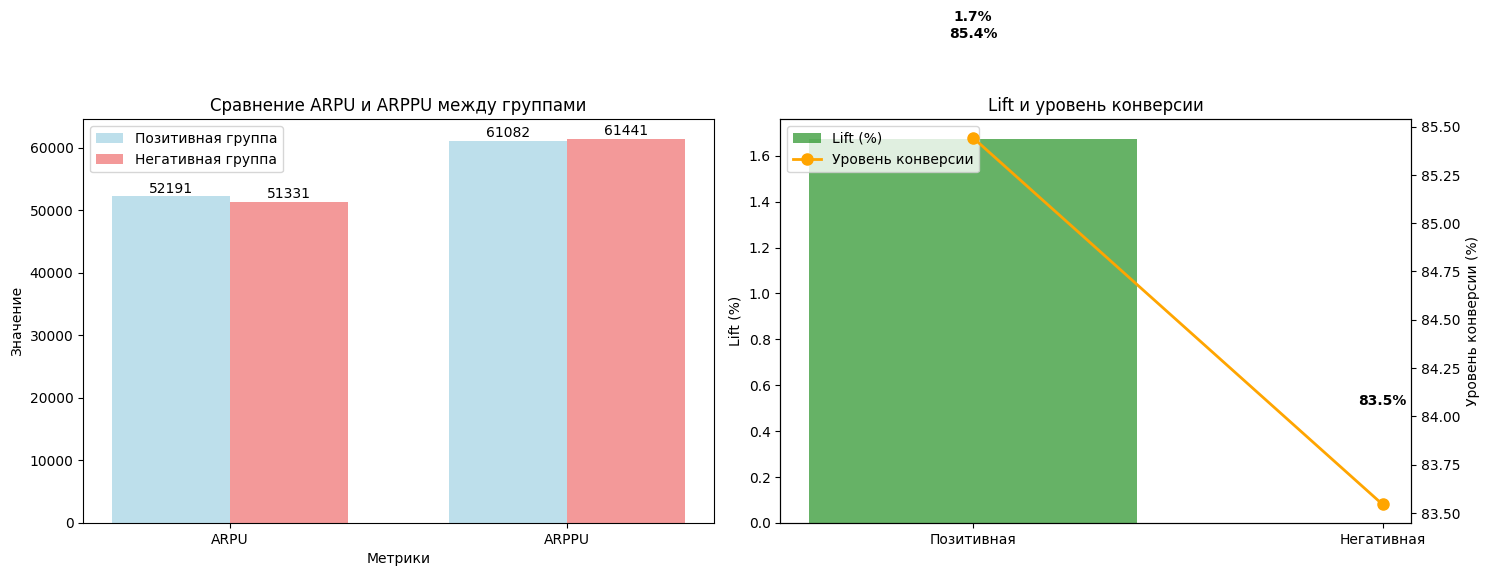

In [24]:
import matplotlib.pyplot as plt
import numpy as np


metrics = ['ARPU', 'ARPPU']
positive_values = [arpu_positive, arppu_positive]
negative_values = [arpu_negative, arppu_negative]


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))


x = np.arange(len(metrics))
width = 0.35

bars1 = ax1.bar(x - width/2, positive_values, width, label='Позитивная группа', alpha=0.8, color='lightblue')
bars2 = ax1.bar(x + width/2, negative_values, width, label='Негативная группа', alpha=0.8, color='lightcoral')

ax1.set_xlabel('Метрики')
ax1.set_ylabel('Значение')
ax1.set_title('Сравнение ARPU и ARPPU между группами')
ax1.set_xticks(x)
ax1.set_xticklabels(metrics)
ax1.legend()


for bar in bars1:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + 100,
             f'{height:.0f}', ha='center', va='bottom')

for bar in bars2:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + 100,
             f'{height:.0f}', ha='center', va='bottom')


lift_data = [lift * 100]  
conversion_data = [conversion_positive * 100, conversion_negative * 100]  


ax2_1 = ax2.twinx()  
bars_lift = ax2.bar(['Lift'], lift_data, alpha=0.6, color='green', label='Lift (%)')
ax2.set_ylabel('Lift (%)')
ax2.set_title('Lift и уровень конверсии')


x_conv = np.arange(2)
ax2_1.plot(x_conv, conversion_data, 'o-', color='orange', linewidth=2, markersize=8, label='Уровень конверсии')
ax2_1.set_ylabel('Уровень конверсии (%)')


lines1, labels1 = ax2.get_legend_handles_labels()
lines2, labels2 = ax2_1.get_legend_handles_labels()
ax2.legend(lines1 + lines2, labels1 + labels2, loc='upper left')


ax2.text(0, lift_data[0] + 0.5, f'{lift_data[0]:.1f}%', ha='center', va='bottom', fontweight='bold')
for i, conv in enumerate(conversion_data):
    ax2_1.text(i, conv + 0.5, f'{conv:.1f}%', ha='center', va='bottom', fontweight='bold')


ax2_1.set_xticks(x_conv)
ax2_1.set_xticklabels(['Позитивная', 'Негативная'])

plt.tight_layout()
plt.show()



A/B тест на всем датасете:

In [25]:
stat_shap, p_shap = stats.shapiro(data_negative)
print(stat_shap, p_shap)

0.181157543689083 1.962020290614301e-61


In [26]:
stat_shap, p_shap = stats.shapiro(data_positive)
print(stat_shap, p_shap)

0.5133195873891292 1.345345193209841e-53


In [27]:
stat_levene, p_levene = stats.levene(data_negative, data_positive)
print(stat_levene, p_levene)


0.3132487932965465 0.5757361138122503


In [28]:
stat, p_val = stats.mannwhitneyu(data_negative, data_positive, alternative='two-sided')
print(stat, p_val)

1057869.0 0.3996400286836105


H0 не отвергается.

Группа positive демонстрирует прирост выручки. Конверсия также возросла. Рекомендуется постепенно внедрять кампанию. 

In [ ]:
df.dtypes

id                               int64
group                           object
gender                         float64
age                            float64
education                       object
city                           float64
country                        float64
lbt_coef                       float64
ac_coef                        float64
sm_coef                        float64
personal_coef                  float64
product                         object
colour                          object
cost                           float64
product_sex                    float64
base_sale                      float64
dt                      datetime64[ns]
conversion                     float64
cost_per_client                float64
discount                       float64
revenue                        float64
loss_per_transaction           float64
dtype: object

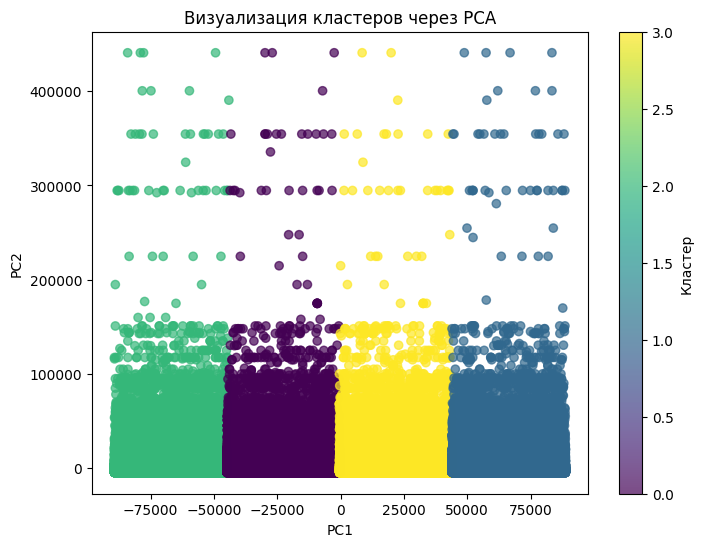

In [30]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
X = df.select_dtypes(include=['int64', 'float64']).copy()
X = X.replace([np.inf, -np.inf], np.nan)
X = X.fillna(X.median())
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=42)
X["cluster"] = kmeans.fit_predict(X)


X = X.fillna(X.mean())
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X)


plt.figure(figsize=(8,6))
plt.scatter(pca_result[:,0], pca_result[:,1], c=X["cluster"], cmap="viridis", alpha=0.7)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Визуализация кластеров через PCA")
plt.colorbar(label="Кластер")
plt.show()


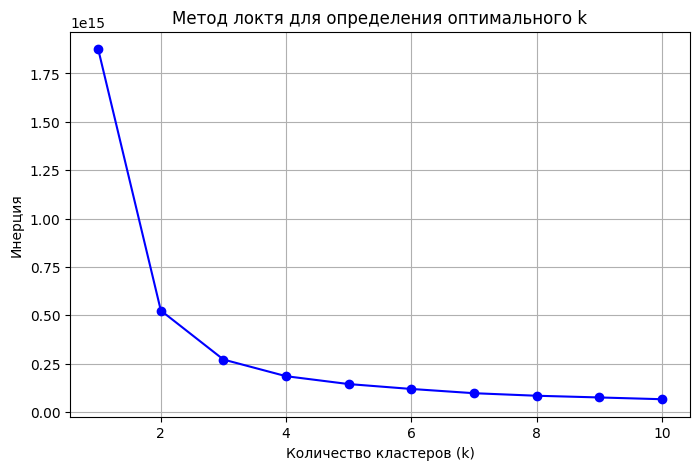

In [31]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
X = df.select_dtypes(include=['int64', 'float64']).copy()


X = X.replace([np.inf, -np.inf], np.nan)
X = X.fillna(X.mean())
inertia = []
k_range = range(1, 11)  
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, 'bo-')
plt.xlabel('Количество кластеров (k)')
plt.ylabel('Инерция')
plt.title('Метод локтя для определения оптимального k')
plt.grid(True)
plt.show()

In [32]:
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
X['cluster'] = kmeans.fit_predict(X)
print(X["cluster"].value_counts())


cluster
1    174093
2    169802
0    168697
3    167823
Name: count, dtype: int64


In [ ]:
X.groupby("cluster").mean(numeric_only=True)




,id,gender,age,city,country,lbt_coef,ac_coef,sm_coef,personal_coef,cost,product_sex,base_sale,conversion,cost_per_client,discount,revenue,loss_per_transaction
cluster,,,,,,,,,,,,,,,,,
0,68251.170586,0.564898,38.661116,1134.540582,31.999733,6.491017,0.032631,0.960205,0.461401,5231.814622,0.752492,0.351954,0.003638,523.181462,0.351954,3925.158062,-5.480461
1,112389.700445,0.562380,38.428957,1135.450216,31.999335,6.488279,0.040337,0.962226,0.461893,5377.622225,0.751680,0.346880,0.002791,537.762223,0.346880,4072.680486,-5.531198
2,22673.279568,0.566729,38.465262,1137.575991,31.999920,6.497898,0.046198,0.962323,0.461324,5481.771493,0.751764,0.345700,0.003697,548.177149,0.345700,4180.326946,-5.542997
3,156191.511190,0.566388,38.448214,1136.568502,31.999738,6.493580,0.043935,0.966838,0.460894,5343.435714,0.752492,0.347518,0.004476,534.343571,0.347518,4049.162171,-5.524815


In [ ]:
X['product'] = df['product']
X.head()

,id,gender,age,city,country,lbt_coef,ac_coef,sm_coef,personal_coef,cost,product_sex,base_sale,conversion,cost_per_client,discount,revenue,loss_per_transaction,cluster,product
0,0,0.0,36.0,1201.0,32.0,5.078678,-0.307147,0.959027,0.5072,13599.0,0.0,1.0,0.00000,1359.9,1.0,0.0,1.0,2,"Велосипед горный женский Stern Mira 2.0 26"""
1,0,0.0,36.0,1201.0,32.0,5.078678,-0.307147,0.959027,0.5072,1499.0,1.0,0.0,0.00000,149.9,0.0,1499.0,-9.0,2,Стол Outventure
2,0,0.0,36.0,1201.0,32.0,5.078678,-0.307147,0.959027,0.5072,4799.0,1.0,0.0,0.00000,479.9,0.0,4799.0,-9.0,2,Набор Outventure: стол + 4 стула
3,3,1.0,31.0,1134.0,32.0,6.937220,0.104693,0.965142,0.4688,2999.0,1.0,0.0,0.00000,299.9,0.0,2999.0,-9.0,2,unknown
4,4,0.0,35.0,1134.0,32.0,4.569378,0.063693,0.820892,0.5072,9199.0,1.0,0.0,0.85443,919.9,0.0,9199.0,-9.0,2,Роликовые коньки детские Roces Orlando III


In [ ]:
X_dim = X[['cluster', 'product']]
X_dim.groupby('cluster').agg(pd.Series)


,product
cluster,
0,"[Кинезиотейп Kinexib Pro, бежевый, Брюки мужск..."
1,[Беговая дорожка электрическая NordicTrack Com...
2,"[Велосипед горный женский Stern Mira 2.0 26"", ..."
3,[Полуботинки для мальчиков Merrell Hut Moc 2.0...


В кластере 0 наблюдается наибольшая стоимость покупок. Группа на 56 процентов состоит из мужчин, средний возраст примерно равен 41,5. Основные продукты -- транспорт и мебель.
Вторая по стоимости покупок группа -- кластер 1. Группа состоит на 52 процента из мужчин и средний возраст примерно равен 41,5. Основные продукты -- обувь и шорты.
Третья по стоимости покупок группа -- кластер 2. Группа состоит на 39 процентов из мужчин и средний возраст примерно равен 41,9. Основной продукт -- аэрозоль от насекомых.
Четвертая по стоимости покупок группа -- кластер 3. Группа состоит на 40 процентов из мужчин и средний возраст примерно равен 42,3. Основной продукт -- транспорт.

Методы работы с кластерами

Кластер 0: Увеличить видимость товаров через рекламу, тестировать минимальные скидки (5-10%), чтобы стимулировать интерес.
Кластер 1: Предлагать премиальные товары с акцентом на качество, использовать скидки 15-20% для крупных покупок.
Кластер 2: Нацелить на семейные наборы (например, стол + стулья), предложить бонусы (доставка) при покупке с детьми.
Кластер 3: Акцентировать спортивные акции, предлагать скидки на аксессуары (экипировка) для повышения среднего чека.

In [ ]:

if 'dt' in df.columns:
    df['purchase_year'] = df['dt'].dt.year
    df['purchase_month'] = df['dt'].dt.month
    df['purchase_day'] = df['dt'].dt.day
    df['purchase_weekday'] = df['dt'].dt.weekday
    df['purchase_hour'] = df['dt'].dt.hour


    df = df.drop(columns=['dt'])


In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline




if 'target' in df.columns:
    df = df.drop(columns=['target'])


df['target'] = (df['cost'] > 0).astype(int)



X = df.drop(columns=['target'])
X = X.select_dtypes(exclude=['datetime64[ns]'])
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

X_train = X_train.replace([np.inf, -np.inf], np.nan)


X_train = X_train.fillna(X_train.median(numeric_only=True))


X_test = X_test.replace([np.inf, -np.inf], np.nan)
X_test = X_test.fillna(X_test.median(numeric_only=True))

cat_cols = X.select_dtypes(include=['object']).columns


preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
    ],
    remainder='passthrough'
)


rf_pipeline = Pipeline([
    ('preprocess', preprocessor),
    ('model', RandomForestClassifier(random_state=42))
])

logreg_pipeline = Pipeline([
    ('preprocess', preprocessor),
    ('model', LogisticRegression(random_state=42, max_iter=1000))
])

score_rf = cross_val_score(rf_pipeline, X_train, y_train, cv=2)
score_logreg = cross_val_score(logreg_pipeline, X_train, y_train, cv=2)

print("RF:", score_rf)
print("LogReg:", score_logreg)

df['purchase_flag'] = (df['cost'] > 0).astype(int)
param_grid_rf = {
    'model__n_estimators': [100, 200, 500],
    'model__max_depth': [3, 5, 10, None],
    'model__min_samples_split': [2, 10, 20],
    'model__min_samples_leaf': [1, 5, 10],
    'model__class_weight': [None, 'balanced']
}


grid_rf = GridSearchCV(
    rf_pipeline,
    param_grid=param_grid_rf,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=2
)

grid_rf.fit(X_train, y_train)

print("Лучшие параметры RF:", grid_rf.best_params_)
print("ROC-AUC (train):", grid_rf.best_score_)
print("ROC-AUC (test):", grid_rf.score(X_test, y_test))


RF: [0.9999958 0.9999958]
LogReg: [0.9999958 1.       ]
Fitting 5 folds for each of 216 candidates, totalling 1080 fits


c:\Users\андрей\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_split.py:811: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\андрей\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_search.py:1135: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan

Лучшие параметры RF: {'model__class_weight': None, 'model__max_depth': 3, 'model__min_samples_leaf': 1, 'model__min_samples_split': 2, 'model__n_estimators': 100}
ROC-AUC (train): nan
ROC-AUC (test): 1.0


In [39]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score


grid_rf.fit(X_train, y_train)


best_rf = grid_rf.best_estimator_
y_pred = best_rf.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

f1 = f1_score(y_test, y_pred, average='weighted')
print("F1 score:", f1)

print("Лучшие гиперпараметры:", grid_rf.best_params_)


Fitting 5 folds for each of 216 candidates, totalling 1080 fits


c:\Users\андрей\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_split.py:811: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\андрей\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_search.py:1135: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan

Accuracy: 0.9999951010410287
Confusion Matrix:
 [[     0      1]
 [     0 204124]]
F1 score: 0.9999926515675431
Лучшие гиперпараметры: {'model__class_weight': None, 'model__max_depth': 3, 'model__min_samples_leaf': 1, 'model__min_samples_split': 2, 'model__n_estimators': 100}


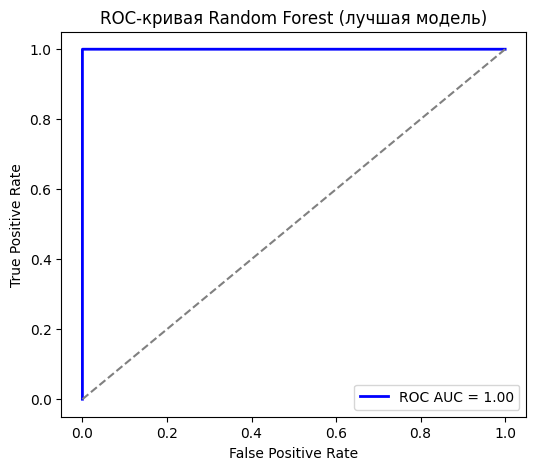

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_pred_proba = best_rf.predict_proba(X_test)[:, 1]


fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)


plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, color="blue", lw=2, label=f"ROC AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], color="gray", linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC-кривая Random Forest (лучшая модель)")
plt.legend(loc="lower right")
plt.show()



In [59]:

df_1188 = df[(df["city"] == 1188)].copy()

print("Всего жителей города 1188:", len(df_1188))
df_1188.head()

features = X_train.columns


X_1188 = df_1188.reindex(columns=features, fill_value=0)


df_1188["probability"] = grid_rf.predict_proba(X_1188)[:, 1]


potential_buyers = df_1188[df_1188["probability"] > 0.5]

print("Всего жителей города 1188:", len(df_1188))
print("Количество потенциальных покупателей:", len(potential_buyers))
print(potential_buyers[["id", "probability"]].sort_values(by="probability", ascending=False).head(10))


Всего жителей города 1188: 77411
Всего жителей города 1188: 77411
Количество потенциальных покупателей: 77411
            id  probability
616978  161613     0.999997
616982  161613     0.999997
650525  170470     0.999997
607933  159182     0.999997
192565   50511     0.999997
381411  100456     0.999997
558553  146128     0.999997
276906   73338     0.999997
296346   78453     0.999997
352208   92898     0.999997


In [61]:
df_1188

,id,group,gender,age,education,city,country,lbt_coef,ac_coef,sm_coef,...,product,colour,cost,product_sex,base_sale,dt,conversion,purchase_flag,target,probability
11,6,unknown,1.0,52.0,среднее,1188.0,32.0,8.150379,0.075200,0.836140,...,Кроссовки для мальчиков Geox J Sprintye Boy,лимонный/черный,4999.0,1.0,0.0,1970-01-01 00:00:00.000000001,0.0,1,1,0.999995
12,6,unknown,1.0,52.0,среднее,1188.0,32.0,8.150379,0.075200,0.836140,...,Кеды мужские Reebok Royal Complete Cln2,черный,4799.0,1.0,1.0,1970-01-01 00:00:00.000000003,0.0,1,1,0.999996
13,6,unknown,1.0,52.0,среднее,1188.0,32.0,8.150379,0.075200,0.836140,...,Футболка мужская Kappa Authentic Core,темно-синий,999.0,1.0,0.0,1970-01-01 00:00:00.000000008,0.0,1,1,0.999996
14,6,unknown,1.0,52.0,среднее,1188.0,32.0,8.150379,0.075200,0.836140,...,Бейсболка детская Nike Futura Mash Up,синий,1119.0,1.0,1.0,1970-01-01 00:00:00.000000011,0.0,1,1,0.999996
15,6,unknown,1.0,52.0,среднее,1188.0,32.0,8.150379,0.075200,0.836140,...,"Носки детские Demix, 2 пары",синий/серый,299.0,1.0,0.0,1970-01-01 00:00:00.000000011,0.0,1,1,0.999995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
680410,178004,unknown,1.0,52.0,высшее,1188.0,32.0,8.437832,-0.080251,0.938592,...,Полуботинки мужские Ascot Vortex,хаки/черный,7999.0,1.0,0.0,1970-01-01 00:00:00.000000012,0.0,1,1,0.999996
680411,178004,unknown,1.0,52.0,высшее,1188.0,32.0,8.437832,-0.080251,0.938592,...,Кроссовки мужские Nike Air Max 90,черный/серый,24299.0,1.0,0.0,1970-01-01 00:00:00.000000013,0.0,1,1,0.999996
680412,178004,unknown,1.0,52.0,высшее,1188.0,32.0,8.437832,-0.080251,0.938592,...,Кроссовки мужские Nike Air Max 90,черный/серый,24299.0,1.0,0.0,1970-01-01 00:00:00.000000020,0.0,1,1,0.999996
680413,178004,unknown,1.0,52.0,высшее,1188.0,32.0,8.437832,-0.080251,0.938592,...,Пакет,коричневый,12.0,1.0,0.0,1970-01-01 00:00:00.000000020,0.0,1,1,0.999996


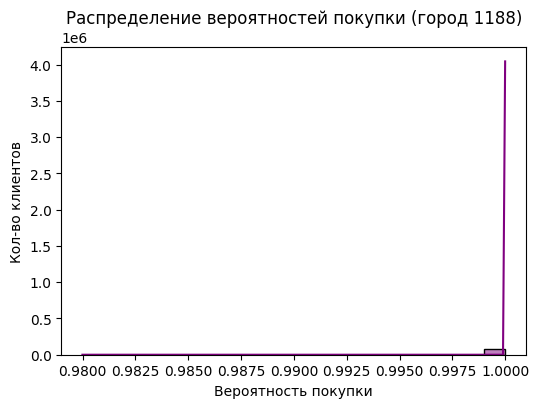

In [60]:
plt.figure(figsize=(6,4))
sns.histplot(df_1188["probability"], bins=20, kde=True, color="purple")
plt.title("Распределение вероятностей покупки (город 1188)")
plt.xlabel("Вероятность покупки")
plt.ylabel("Кол-во клиентов")
plt.show()
